In [1]:
import random
import numpy
import torch
import os, sys
from DLStudio import *
import copy
from model import GANTrainer, Discriminator, Generator
from utils import calculateFID, image_generator
from dataset import ImageDataset

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as tvt
import torchvision.transforms.functional as tvtF
import imageio
import time
import cv2


seed = 0           
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
numpy.random.seed(seed)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmarks=False
os.environ['PYTHONHASHSEED'] = str(seed)


In [3]:
image_dir = 'Supplementary/celeba_dataset_64x64'
transform = tvt.Compose([
    tvt.ToTensor(),
    tvt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = ImageDataset(image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [4]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
gantrainer= GANTrainer(train_dataloader= dataloader, epochs=1, batch_size=32, device=device, lr=1e-4)

Weight file not provided for Discriminator. Initializing the weights!
Weight file not provided for Generator. Initializing the weights!
epoch=1/1   iter= 100   Dis Loss=0.3555    Gen Loss=8.4958
epoch=1/1   iter= 200   Dis Loss=0.2476    Gen Loss=8.0119
epoch=1/1   iter= 300   Dis Loss=0.1322    Gen Loss=6.1991


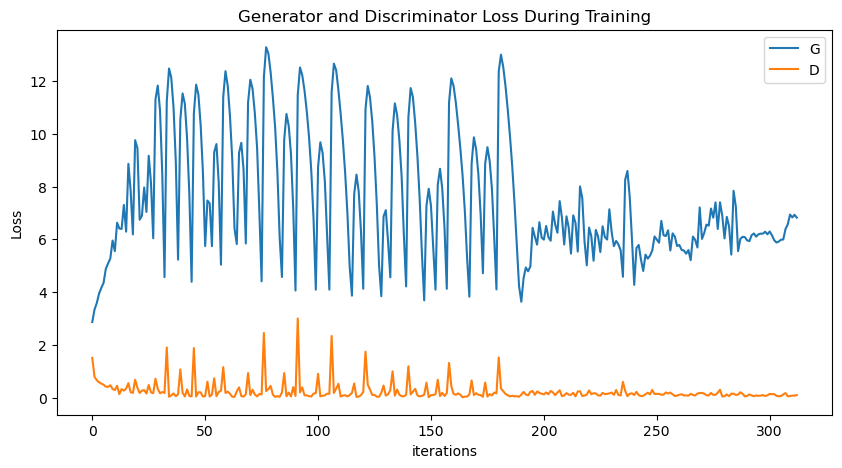

In [6]:
gantrainer.train()

In [7]:
generator= Generator()
img_generator= image_generator(generator, 'netGcheckpoint.pt')
img_generator.generate(1000, 'dcgan_FIDoutputtry')

Weight file found for Generator. Using the saved weights!
Saved generated image 1 at dcgan_FIDoutputtry/generated_image_1.png
Saved generated image 2 at dcgan_FIDoutputtry/generated_image_2.png
Saved generated image 3 at dcgan_FIDoutputtry/generated_image_3.png
Saved generated image 4 at dcgan_FIDoutputtry/generated_image_4.png
Saved generated image 5 at dcgan_FIDoutputtry/generated_image_5.png
Saved generated image 6 at dcgan_FIDoutputtry/generated_image_6.png
Saved generated image 7 at dcgan_FIDoutputtry/generated_image_7.png
Saved generated image 8 at dcgan_FIDoutputtry/generated_image_8.png
Saved generated image 9 at dcgan_FIDoutputtry/generated_image_9.png
Saved generated image 10 at dcgan_FIDoutputtry/generated_image_10.png
Saved generated image 11 at dcgan_FIDoutputtry/generated_image_11.png
Saved generated image 12 at dcgan_FIDoutputtry/generated_image_12.png
Saved generated image 13 at dcgan_FIDoutputtry/generated_image_13.png
Saved generated image 14 at dcgan_FIDoutputtry/gen

In [8]:
FIDcalculator= calculateFID()

In [9]:
fid_value_gan= FIDcalculator('Supplementary/celeba_dataset_64x64', 'dcgan_FIDoutput')
print('The FID for the images generated using DCGAN is: ', fid_value_gan)

 60%|█████▉    | 119/200 [08:41<05:54,  4.38s/it]


KeyboardInterrupt: 

In [ ]:
fid_value_diffusion= FIDcalculator('Supplementary/celeba_dataset_64x64', 'ExamplesDiffusion/visualize_samples')
print('The FID for the images generated using Diffusion is: ', fid_value_diffusion)

100%|██████████| 41/41 [03:11<00:00,  4.66s/it]


FID: 48.96
The FID for the images generated using Diffusion is:  48.96170861234003
